In [64]:
import math
import operator

In [82]:
train={
    'user1':{
        'item1':1,
        'item2':2,
        'item3':3,
    },
    'user2':{
        'item1':3,
        'item3':3,
        'item4':4
    },
    'user3':{
        'item2':4,
        'item4':2,
        'item5':1,
    },
    'user4':{
        'item1':4,
        'item2':5,
    },
    'user5':{
        'item3':4,
        'item5':2,
    }
}

###### 基于物品的协同过滤算法
- 计算物品相似度
- 根据物品相似度和用户历史行为给用户生成推荐列表

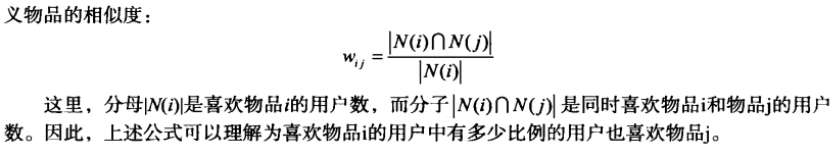

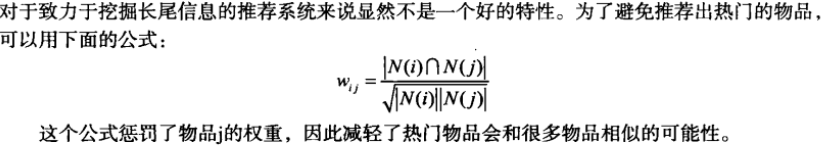

In [83]:
def ItemSimilarity(train):
    N=dict()
    C=dict()
    for u,items in train.items():
        for i in items:
            if i not in N:
                N[i]=0
            N[i]+=1
            for j in items:
                if i==j:continue
                if i not in C:
                    C[i]=dict()
                if j not in C[i]:
                    C[i][j]=0
                C[i][j]+=1
    W=dict()
    for i,related_items in C.items():
        for j,C_ij in related_items.items():
            if i not in W:
                W[i]=dict()
            if j not in W[i]:
                W[i][j]=0
            W[i][j]=C_ij/math.sqrt(N[i]*N[j])
    return W

In [84]:
W=ItemSimilarity(train)

In [85]:
W

{'item1': {'item2': 0.6666666666666666,
  'item3': 0.6666666666666666,
  'item4': 0.4082482904638631},
 'item2': {'item1': 0.6666666666666666,
  'item3': 0.3333333333333333,
  'item4': 0.4082482904638631,
  'item5': 0.4082482904638631},
 'item3': {'item1': 0.6666666666666666,
  'item2': 0.3333333333333333,
  'item4': 0.4082482904638631,
  'item5': 0.4082482904638631},
 'item4': {'item1': 0.4082482904638631,
  'item3': 0.4082482904638631,
  'item2': 0.4082482904638631,
  'item5': 0.5},
 'item5': {'item2': 0.4082482904638631,
  'item4': 0.5,
  'item3': 0.4082482904638631}}

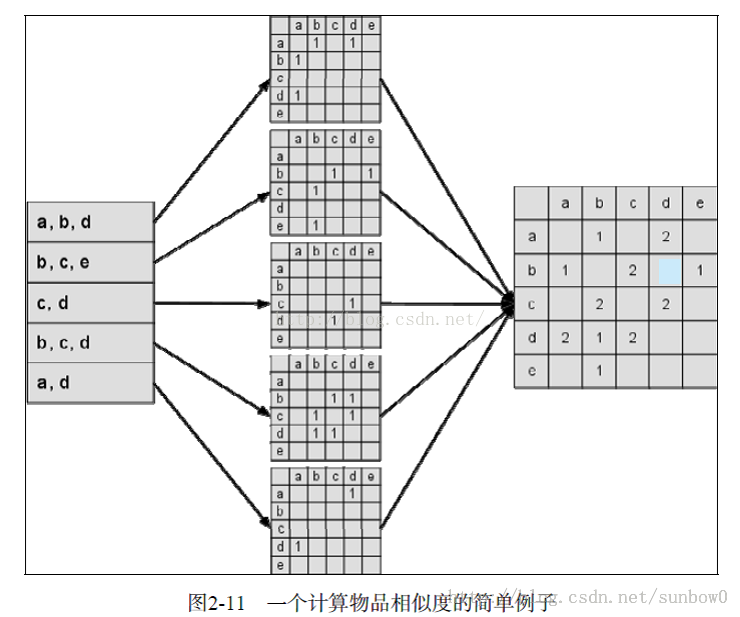
1. 很好的一张图，很快理解，五个小表格代表五个user，N(i)代表一横/竖行
2. 换成UserCF，五个小表格代表五个item，横列坐标换成user1~user5


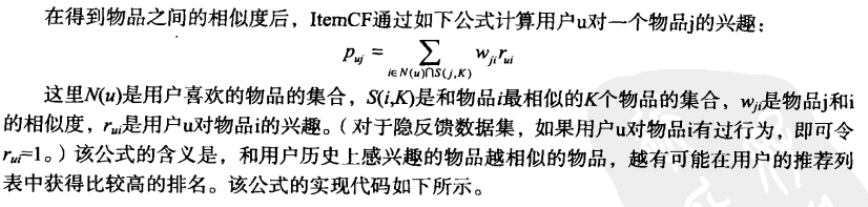

In [93]:
def Recommend(user_id,train,W,K):
    rank=dict()
    R_u=train[user_id]
    for i,r_ui in ru.items():
        for j,W_ij in sorted(W[i].items(),key=operator.itemgetter(1),reverse=True)[0:K]:
            if j in R_u:continue
            if j not in rank:
                rank[j]=0
            rank[j]+=r_ui*W_ij
    return rank

In [94]:
rank=Recommend('user1',train,W,3)
rank

{'item4': 2.4494897427831783, 'item5': 2.041241452319315}

#### IUF(Inverse User Frequence)
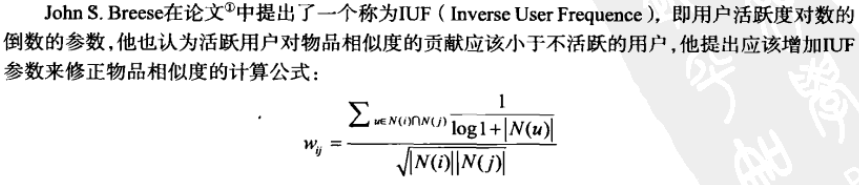
- 对活跃用户做软性惩罚

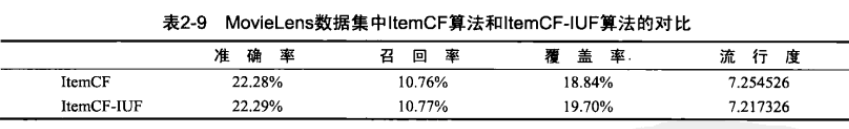

#### 物品相似度归一化
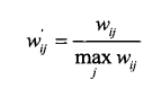
- 相似度归一化可以提高多样性

- 表现为覆盖率提高
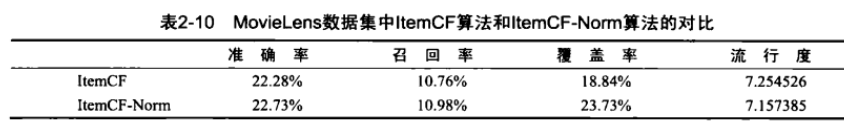